# Basis Function Representations/Approximations

1. A basis is a collections of vectors/functions whose weighted sum approximates some other vector/function

$$\sum_{k=0}^K \langle f, b_k \rangle b_k \approx \sum_{k=0}^\infty \langle f, b_k \rangle b_k \quad \text{ or } \quad X_{n\times m} \approx U_{n\times d}D_{d\times d}[V^T]_{d\times m} \quad \text{ or } \quad X \hat \beta \approx y \quad \text{ or } \quad \underset{\text{with (not unlimited) 15 digits of precision}}{\text{64-bit floating point numbers}}$$

2. The accuracy of the approximation depends on the available basis functions

   $\quad\quad\quad\quad\quad\quad$ Increase $K$ $\quad$|$\quad$ Increase $d$ $\quad$|$\quad$ Use better predicting features $\quad$|$\quad$ Use 128-bit floating point numbers
   

3. The basis vectors/functions are interpreted as the axes of coordinate system

   $\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$ $b_k$ $\quad$|$\quad$ $V_{\cdot k}$ $\quad$|$\quad$ $X_{\cdot k}$ $\quad$|$\quad$ bit $b_k$ contribution


4. Each point in the coordinate system represents a weighted sum of the vectors/functions according to the coorinates of the point on each axis

   $\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$ $\langle f, b_k \rangle$ $\quad$|$\quad$ $U_{i k}D_{kk}$ $\quad$|$\quad$ $\beta_{k}$ $\quad$|$\quad$ bit $b_k$ value


## [Extra/Omitted/Recommended/Not Required]<br>Motivating this from Coding Challenge I and (Least Squares) Linear Regression 

***Coding Challenge I*** examined ***orthogonal basis functions*** $b_k(x)$ and ***fourier coefficients*** $c_k = \langle f,b_k \rangle$ which define the approximation

$$f(x) \approx  \sum_{k=-d}^d c_k b_k(x) \color{gray}{= \sum_{k=-d}^d c_k e^{k\frac{x}{L}2\pi i} =   c+\sum_{k=1}^d \left[ a_k \sin\left(k\frac{x}{L} 2\pi \right) + a_k'\cos\left( k\frac{x}{L}2\pi\right) \right]} $$

> The term ***fourier coefficients*** actually refers to the fact that the ***inner product*** $c_k = \langle f,b_k \rangle$ provides an $L_2$ optimal approximation $|| f - \sum_{k=0}^d  \langle f, b_k \rangle b_k ||_2^2 \leq || f - \sum_{k=0}^d  a_kb_k ||_2^2$ (for any $a_k$) for any set of ***orthogonal basis functions*** $b_k$ (not just the ***fourier series***).

***Coding Challenge I*** further examined the related ***fast Fourier transform (FFT)*** implementation of the ***discretized Fourier transform (DFT)*** $\tilde x = Ax$ $(x = \frac{1}{n}{A^*}\tilde x = \frac{1}{n}\overline{A^{T}} \tilde x)$ where $\tilde x$ contains the ***Fourier coefficients*** for some discretized function represented by vector $x$ with each of the discretized ***orthogonal*** $\texttt{b}_k = A_{\cdot k}$ created on the basis of the ***Fourier series basis functions***. And since $A$ and ($A^*$) are ***symmetric***, this shows then that 

- the vector $\tilde x = \sum_{k=1}^n x_k \texttt{b}_k  $ is a (discretized) function that is the ($x$) weighted sum of (discretized) ***basis functions*** (and vice-versa for $x$ based on $\tilde x$).


The $\tilde x = A_{n \times n}x$ above is seen to be a special case of $b_{n\times 1} = A_{n\times m}x_{m\times 1}$ where a point $b$ in $n$-dimensional space is the projection of a point $x$ in $m$-dimensional space based on its coordinates $x_j$ on axes defined by the column vectors $A_{\cdot j}$ (projecting $m$-dimensional subspace into $n$-dimensional space)


$$b = b_1\underset{\text{$e_i$ are the so-called standard basis vectors}}{ \overbrace{\left[ \begin{array}{c}1\\0\\\vdots\\0 \end{array}\right]}^{e_1} + b_2 \overbrace{\left[ \begin{array}{c}0\\1\\\vdots\\0 \end{array}\right]}^{e_2} + \cdots + b_n \overbrace{\left[ \begin{array}{c}0\\0\\\vdots\\1 \end{array}\right]}^{e_n}} = \sum_{i=1}^n b_i e_{i} = \sum_{j=1}^m x_j A_{\cdot j} = Ax$$

which is further seen to be a special case of $y \approx \hat y = X_{n \times p} \hat \beta$ defining a ***linear model*** with $\hat \beta = \min_\beta ||y - X\beta||^2_2 = \min_\beta ||y - \sum_{i=1}^p \hat\beta_j X_{\cdot p} ||^2_2$.

- Think of this just like $f(x) \approx  \sum_{k=-d}^d c_k b_k(x)$ except $y$ is discretized $f$ and $X_{\cdot p}$ taking the place of ***basis functions*** $b_k(x)$ are not ***orthogonal***.

The $\hat \beta$ is thus something like "Fourier coefficients" which are the coordinates in $p$-dimensional space that are "optimally" projected into $n$-dimensional space through their weighted combination of the ***basis functions*** $X_{\cdot p}$.  Treating the columns of $X$ as basis functions is suggested through expressions of the form $E[y] = \beta_0 + x\beta_1 + x^2\beta_2 + x^3\beta_3 + \cdots = X \beta$ where the ***basis functions*** are the ***monomial polynomials***, or even $E[y] = \beta_0 + x_1\beta_1 + x_2\beta_2 + x_1^2\beta_3 + x_2^2\beta_4 + \cdots = X\beta$ where the vector of sorted $y_{(i)}$ ("function") is approximated as a weighted sum of the correspondingly sorted columns $x_{(i)1}, x_{(i)2}, x_{(i)1}^2, x_{(i)2}^2, \cdots$,  all of which makes it clear that approximating $y$ well depends on identifying a collection of ***basis functions*** $X_{\cdot p}$ whose weighted sum produces $\hat y \approx y$. 

If $y \approx \hat y = X\hat \beta$ is a poor approximation, the solution is to add better discretized basis functions (columns of $X$) that can improve the weighted sum $\hat y$. 

## [Extra/Omitted/Recommended/Not Required]<br>Estimation versus Approximation versus...

The $\hat \beta$ above is the solution of a system of linear equations which can be found by ***direct methods*** or ***iterative methods***<br>(as seen in [STA410_W24_Week6_Lecture_IterativeMethods.ipynb](https://github.com/pointOfive/STA410_W24_StatisticalComputation/blob/main/Week6/STA410_W24_Week6_Lecture_IterativeMethods.ipynb)). 
- ***Iterative methods*** provide a squence of increasingly accurate ***approximate*** solutions (often using an optimization perspective).


> ***Interpolation*** involves imputing unknown values between known values, while ***extrapolation*** involves imputing unknown values beyond the range of observed values. Interpolation using ***Lagrange polynomials*** is considered in [STA410_W24_Week6_Extra_LagrangePolynomialInterpolation.ipynb](). Naturally, ***interpolation*** and ***extrapolation*** are distinct concepts from ***approximation*** and ***estimation***.



When $X \hat \beta \approx y$ is interpreted as $X \hat \beta = \hat y \approx E[y|X]$ the ***approximation*** problem becomes an ***estimation*** problem that is dependent on the observed $X$ and $y$ data, and ***estimation*** of $E[y|X]$ can be improved on the basis of increased data.

The process of ***approximating*** $g(x)=E[y|x]$ as a model $f(x)$ from some class of models $\mathcal F$ and then ***estimating*** $\hat f(x)$ 

- for example as $\tilde X \hat \beta \in \mathcal F = \{ X\beta \}$ the class of ***linear models*** (where the $\tilde X$ notation indicates consideration of different design matrices)

combines ***approximation*** and ***estimation*** together for the (additionally distinct) tasks of ***data smoothing*** or ***prediction***

$$\underbrace{\overset{\textbf{approximated}\text{ with model class }}{E[y|x] = g(x) \approx \underset{\in \mathcal F}{f(x)}} \quad \underset{\text{based on observed data}}{\textbf{estimated}\quad\quad\;} \quad \text{ as} \quad \hat f(x)}_{\Large \textbf{data smoothing or prediction}}$$

where ***data smoothing*** indicates interest identifying robust and simply interpretable trends in data, while ***prediction*** indicates interest instead in optimal future predictive performance.

> It is of course ideal for ***prediction*** when $E[y|x] = g(x) \in \mathcal F$ so 
$$\displaystyle \lim_{n \rightarrow \infty} \hat f_n(x) \rightarrow E[y|x] = g(x)$$
but any family of functional forms $\mathcal F$ which is simple and parsimonious and yet still capable of representating the important ***generalizable*** characteristics of the data such as
$y=\beta_0+\beta_1x \approx E[y|x]$ may still be of interest ***prediction*** and especially ***data smoothing***. 

## [Extra/Omitted/Recommended/Not Required]<br>Linear Model Regression

A linear model regresison fit $\displaystyle \hat y = \hat f(x) = \sum_k \hat \beta_k x_k$ for 

$$y = \underbrace{E[y|x]}_{g(x)} + \epsilon \approx \underbrace{\left(\beta_0 + \sum_ j \beta_{j}x_j + \sum_ j \beta_{p+1+j}x_j^2 + \cdots\right)}_{f(x)} + \epsilon$$

can be seen as a ***data smoothing*** or ***prediction*** process based on

1. ***approximating*** $g(x) = E[y|x]$ with $f^{best}(x) \approx g(x)$ with the $\{x_k: k=0,\cdots,d\}$ ***basis***

2. ***estimating*** $\{\hat \beta_k: k=0,\cdots,d\}$ which specifies $\hat f(x) \approx f^{best}(x)$ based on the observed $X$ and $y$ data

The accuracy of $\hat f(x) \approx E[y|x]$ then depends on 

1. the ***basis*** $\{x_k: k=0,\cdots,d\}$ which determines the accuracy of the $f^{best}(x) \approx g(x)$ ***approximation***, which is essentially theoretically unconstrained; and,
2. the observed data $X$ and $y$ which determines the accuracy of the $\hat f(x) \approx f^{best}(x)$ ***estimation***, which may be constrained by the practical limitations of collecting data

By increasing the representational capability of the $\{x_k: k=0,\cdots,d\}$ ***basis***, the $f^{best}(x) \approx g(x)$ ***approximation*** improves; however, there is a ***curse of dimensionality*** in that the larger the dimension $d$ of the ***basis***, the worse the $\hat f(x) \approx f^{best}(x)$ ***estimation*** will be. This can be understood as simply due to the fact that higher dimensional spaces is larger, and so the point $\{\hat \beta_k: k=0,\cdots,d\}$ defining $\hat f(x)$ will tend to be further and further away from the point $\{\beta_k: k=0,\cdots,d\}$ defining $f^{best}(x)$ as $d$ increases.  Practically this means that theoretical gains in accuracy of $f^{best}(x) \approx g(x)$ can be lost by corresponding reduced accuracy in $\hat f(x) \approx f^{best}(x)$. Thus, practical limitations on the choice of the $\{x_k: k=0,\cdots,d\}$ ***basis*** follow from limitations in $X$ and $y$ data.

> ***Generalizability*** refers to how effective the $\hat f(x) \approx f^{best}(x) \approx g(x)$ ***estimation*** and ***approximation*** is; and, the above considerations suggests that this will tend to dependend upon the degree of the polynomial and choice of $X$.

# Spline Basis Functions 

The ***truncated power functions*** (along with some leading ***monomials***) form a ***basis*** of functions that are 

- ***smooth*** $p-1$ times [***continuously differentiable***](https://en.wikipedia.org/wiki/Smoothness)
- ***piecewise polynomials*** of order $p$ 

that for a sufficient number of well-chosen ***knots*** $k$ can provide good approximations for many functions

\begin{align*}
  f(x) \approx \hat f(x) = {}& \sum_{j=0}^{p+k} \beta_j b_j(x)\\
  \{b_j(x): j=0, \cdots, p+k\} = {}& \{1, x, x^2, \cdots , x^p, (x-z_1)^p_+, \cdots , (x-z_k)^p_+\}\\
\text{where } y^p_+ = {}& \left \{ \begin{array}{rl}y^p&y> 0 \\0 & y \leq 0\end{array} \right .
  \end{align*}

For example, ***cubic-splines*** with $p=3$ and reasonable ***knots*** are smooth but do not oscilate (like high order polynomials); and, if the second derivative is set to $0$ outside the ***knots*** so the function is linear outside the knots, then the resulting function generally appears "natural" to the human eye (and thus this latter formulation are called ***natural cubic-splines***). 

> ***Truncated power functions*** are usually dismissed in favor of ***B-splines*** because ***B-spline basis functions*** provide the same smoothness and piecewise polynomial behavior but are also
>  - more numerically stable than polynomial power calculations
>  - protective against ***multicollinearity*** since
>    - with ***truncated power functions*** the powers of $x$ can be correlated 
>    - the final $k$ ***truncated power functions*** are equal to each other for $x$ less than their corresponding $x<z_i$ truncation   
>    - whereas ***B-spline basis functions*** are "locally nonzero" and thus produce more "balanced", less correlated vector instantiations
>
> all of which lead to a better distribution of ***singular values*** and lower ***condition numbers*** in the ***design matrices*** $X$ produced by ***B-spline basis functions*** as opposed to ***truncated power functions***.

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from patsy import dmatrix, bs, build_design_matrices
import statsmodels.api as sm
import pandas as pd
plt.style.use('seaborn-v0_8-colorblind')

[ 1  1  1 -1  1  2  1]


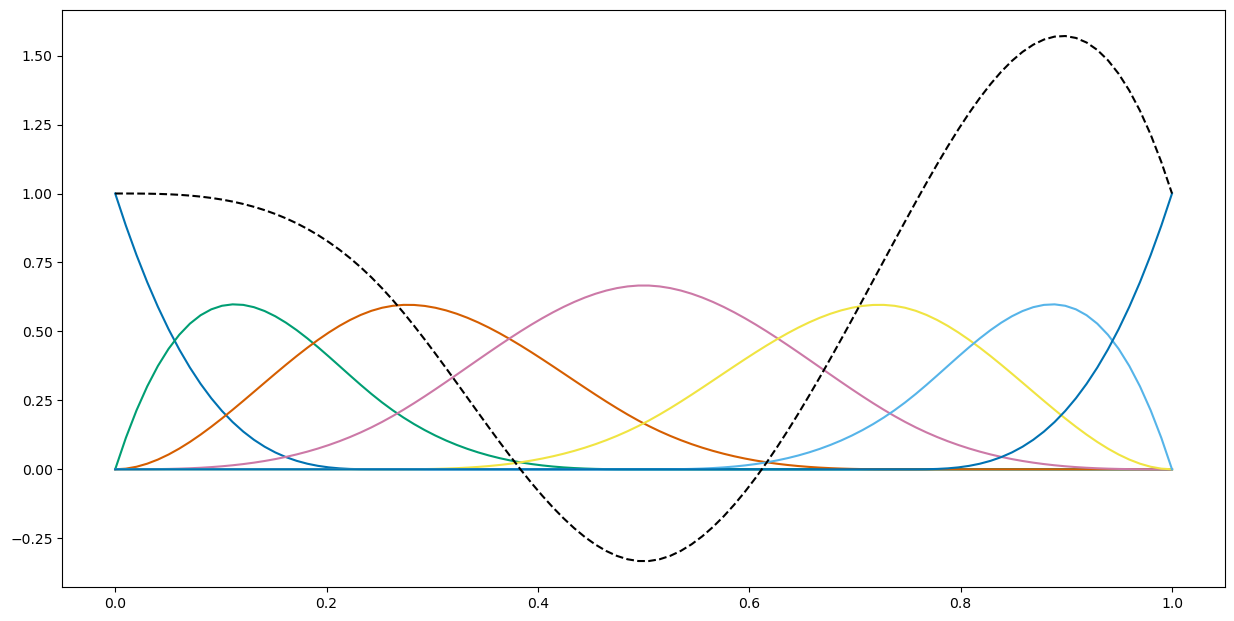

In [33]:
x = np.linspace(0., 1., 100)
y = dmatrix("bs(x, knots=[.25,.5,.75], degree=3, include_intercept=True) - 1", {"x": x})
Xs = np.asarray(build_design_matrices([y.design_info],  {"x": x})[0])

b = np.array([1,1,1,-1,1,2,1])

plt.figure(figsize=(15,7.5))
plt.plot(x, Xs); plt.plot(x,np.dot(Xs,b),'k--')
print(b)

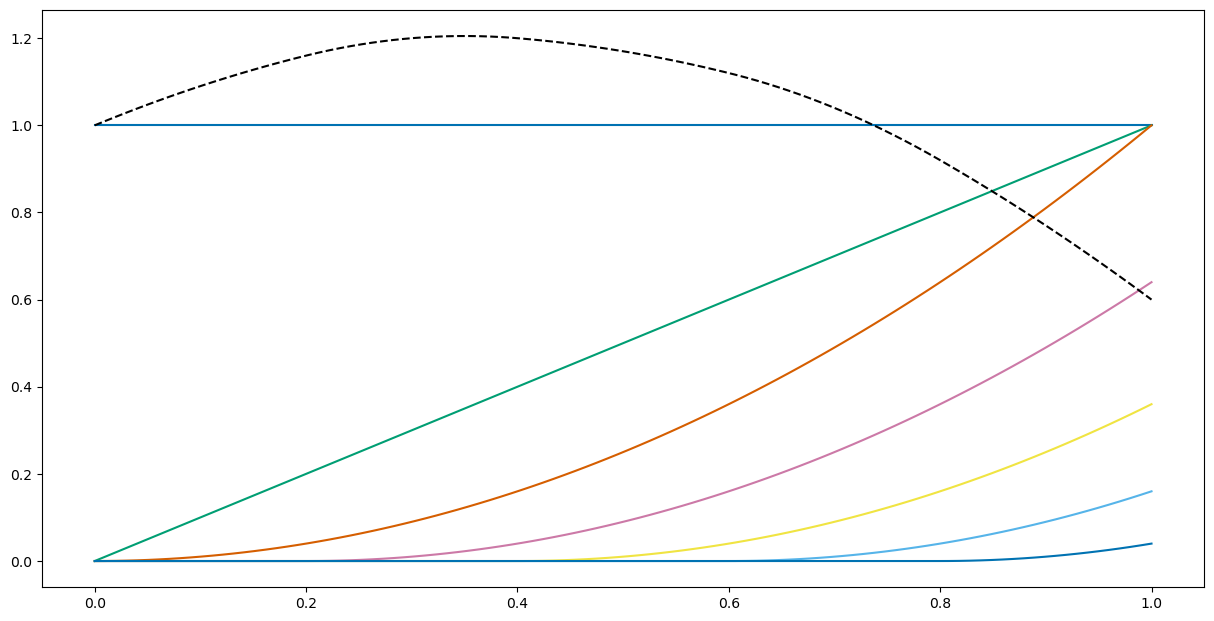

In [3]:
# compare against a truncated power function basis
x = np.linspace(0., 1., 100)
X = np.c_[1+0*x,x,x**2,(x>.2)*(x-.2)**2,(x>.4)*(x-.4)**2,(x>.6)*(x-.6)**2,(x>.8)*(x-.8)**2]

plt.figure(figsize=(15,7.5))
b = np.array([1,1,-1,-1,1,-1,1])
plt.plot(x, X); plt.plot(x,np.dot(X,b),'k--');

With corresponding condition numbers (indicating degree of multicollinearity)


(665254.0870933023, 26.259574828082954)

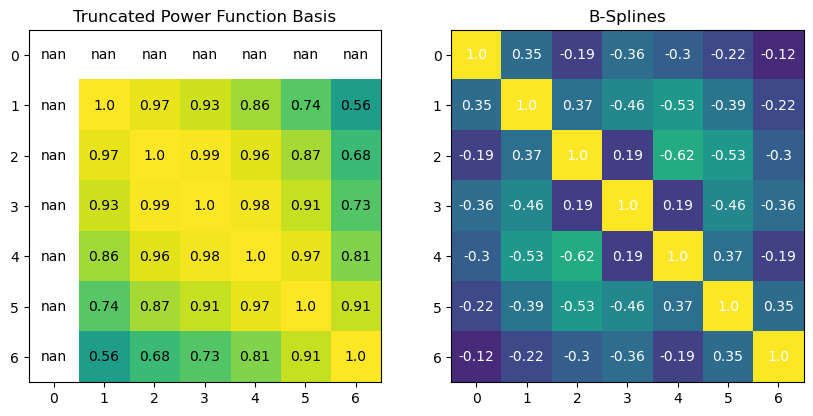

In [13]:
# Truncated Power Function Basis create correlated (multicollinaer) data
# while B-Splines create much more uncorrelated data
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(np.abs(np.corrcoef(X.T)),vmax=1,vmin=0)
ax[0].set_title("Truncated Power Function Basis")
for i in range(7):
    for j in range(7):
        ax[0].text(x=j, y=i, s=np.round(np.corrcoef(X.T),2)[i,j], horizontalalignment='center', verticalalignment='center')
ax[1].imshow(np.abs(np.corrcoef(Xs.T)),vmax=1,vmin=0)
for i in range(7):
    for j in range(7):
        ax[1].text(x=j, y=i, s=np.round(np.corrcoef(Xs.T),2)[i,j], color='white', horizontalalignment='center', verticalalignment='center')
_=ax[1].set_title("B-Splines")

print("With corresponding condition numbers (indicating degree of multicollinearity)")
np.linalg.cond(X)**2, np.linalg.cond(Xs)**2

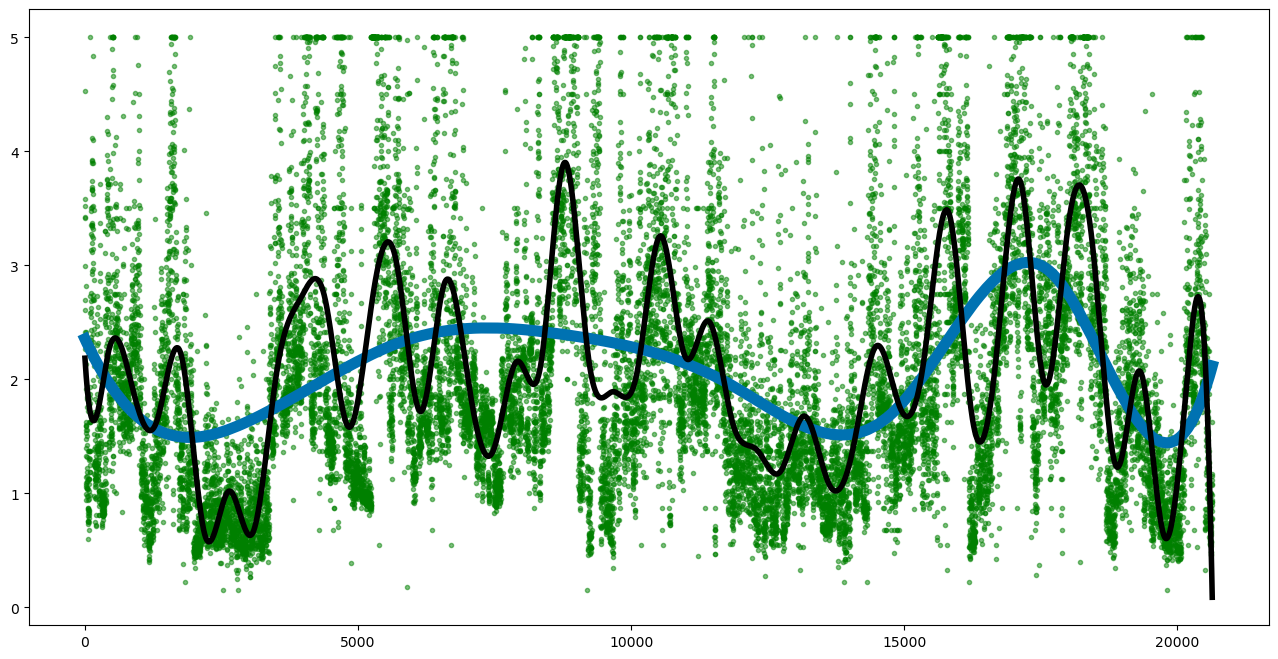

In [ ]:
# https://www.datatechnotes.com/2021/11/scattered-data-spline-fitting-example.html
# boston = load_boston()
# y = boston.target
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
y = housing.target
x = range(0, len(y))
# https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/
# http://www.science.smith.edu/~jcrouser/SDS293/labs/lab13-py.html
bsv1 = dmatrix("bs(train, df=10, include_intercept=True)", 
                        {"train": x}, return_type='dataframe')
fit1 = sm.GLM(y, bsv1).fit()
bsv2 = dmatrix("bs(train, df=50, include_intercept=True)", 
                        {"train": x}, return_type='dataframe')
fit2 = sm.GLM(y, bsv2).fit()

plt.figure(figsize=(16,8))
plt.plot(x, y, '.', c='g', alpha=0.5)
plt.plot(x,fit1.predict(bsv1), linewidth=8)
plt.plot(x,fit2.predict(bsv2), c='k', linewidth=4)

# Smoothing Matrices


<!-- - This section is adapted from the presentation in Keith Knight's STA410 [notes9.pdf](https://q.utoronto.ca/courses/296804/files?preview=24301088) document. -->

Linear model regression creates $X\hat \beta \approx y$ where the exactness of the approximation is determined by the (hopefully somewhat) familar ***hat matrix***

$$\hat y = \underbrace{X(X^TX)^{-}X^T}_{H_{n \times n}}y$$

which is itself determined by the choice of ***basis functions*** of the ***design matrix*** $X$, e.g., 

$$X\beta = \underset{\text{traditional modeling}}{\left(\beta_0 + \sum_ j \beta_{j}x_j + \sum_ j \beta_{p+1+j}x_j^2 + \cdots\right)} \quad \text{ or } \quad \underset{\text{B-spline modeling}}{X\beta = \beta_0 + \sum_j \sum_k \beta_{jk} b_{jk}(x_j)}$$

Alternatively however, the ***projection matrix*** $H$ may be replaced with ***smoothing matrix*** $S$ parameterized by ***positive definite*** $A$ and ***penalty parameter*** $\lambda$ such that

$$\hat y = \underbrace{(I + \lambda A)^{-1}}_{S_{n \times n}} y \quad y^T A y \geq 0, \lambda \geq 0 $$

which makes $\hat y_i$ a weighted linear combination of $y_i$ and all $y_{j \not = i}$ which solves the ***penalized least squares*** problem

$$\nabla_{\hat y} \left(\underset{\text{$\hat y_i$ with close $x_i$ should be close}}{\overset{\text{Penalized Least Squares: $A$ means}}{(y-\hat y)^T(y-\hat y) + \lambda \hat y^T \!\!A \hat y}} \right) = -2y + 2\hat y + 2 \lambda A \hat y = 0$$

> An intuitive illustrative example would be a ***smoothing matrix*** $S$ which makes $\hat y_i$ a weighted linear combination of $y_i$ and all $y_{j \not = i}$ on the basis of weights which decay as the distance beween features $\mathbf x_i$ and $\mathbf x_{j \not = i}$ increases. 
> Examples of this are [***LOESS***](https://en.wikipedia.org/wiki/Local_regression), [***LOWESS***](https://en.wikipedia.org/wiki/Local_regression), and [***cubic smoothing splines***](https://en.wikipedia.org/wiki/Smoothing_spline#Cubic_spline_definition) which implicitly induce a ***smoothing matrix*** $S$ based on local averaging and proximity-driven weight decay.
>
> - The latter of these is named after the fact that its [optimal solution](https://en.wikipedia.org/wiki/Smoothing_spline#Derivation_of_the_cubic_smoothing_spline) 
> $\overset{\text{optimal natural cubic spline $f_\lambda^*$ depends on the penalty parameter $\lambda > 0$}}{{f}_\lambda^{*} = \underset{ f}{\text{argmin}} \sum _{i=1}^{n}\{y_{i}-{ {f}}(x_{i})\}^{2}+\lambda \int { {f}}''(x)^{2}\,dx}$
> $\;$ is in fact a<br>[***natural cubic spline***](https://en.wikipedia.org/wiki/Spline_(mathematics)#Algorithm_for_computing_natural_cubic_splines) (with knots $z_i$ at every observed value of $x_i$ and third-order coefficients whose magnitudes are penalized by $\lambda$). 
>
>
> - Even though the optimal function ${f}_\lambda^{*}$ for ***cubic smoothing splines*** is a ***natural cubic spline***, it is not one created from the ***hat matrix*** $H = X(X^TX)^{-1}X^T$ for some ***design matrix*** $X$ constructed from ***natural cubic spline basis functions***.
>    - Using $n$ knots would produce more parameters than data points, so the ***hat matrix*** $H$ would then perfectly fit the data corresponding to a ***cubic smoothing splines*** with $\lambda = 0$ which induces no penalization on the magnitude third-order coefficients.
> - The ***natural cubic spline*** fit ${f}_\lambda^{*}$ for ***cubic smoothing splines*** is obtained as the solution to a ***penalized least squares*** "smoothing" problem $\hat y = {(I + \lambda A)^{-1}} y\; (y^T A y \geq 0, \lambda \geq 0)$ for ***smoothing matrix*** $S$ and not through a ***design matrix*** $X$ based on ***natural cubic splines*** which would imply a "hat matrix" for a ***least squares*** problem $\hat y = Hy = X(X^TX)^{-1}X^Ty$. 
>    - ***Smoothing matrices*** induce an optimal solution to a ***penalized least squares*** problem, while ***spline basis functions*** specify a ***least squares*** problem. 

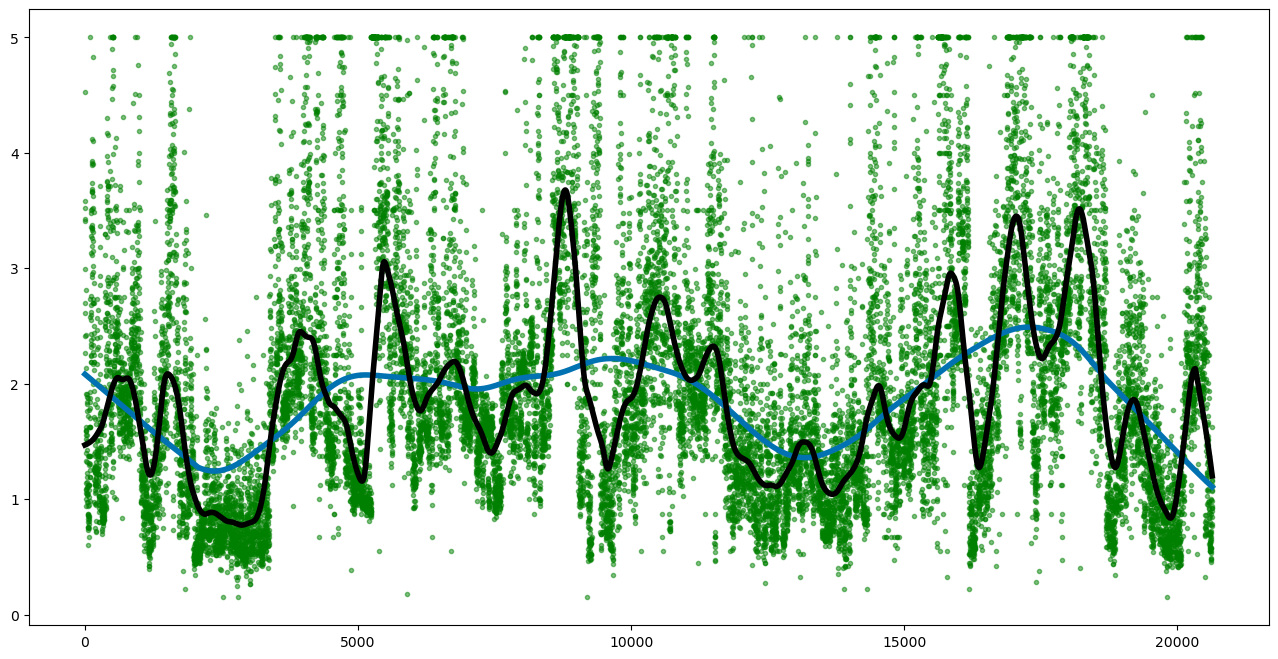

In [21]:
lowess = sm.nonparametric.lowess
plt.figure(figsize=(16,8))
plt.plot(x, y, '.', c='g', alpha=0.5)
z = lowess(y, x, frac=20/100)
plt.plot(*z.T, linewidth=4)
z = lowess(y, x, frac=3/100)
plt.plot(*z.T, c='k', linewidth=4)

## [Extra/Omitted/Recommended/Not Required]<br>Smoothing matrices and their basis function representaitons

The ***smoothing matrix*** $S$ will be ***idempotent*** (so $SS=S$) if $A \hat y = 0$ since by the ***Sherman-Morrison-Woodbury*** formula

$$SS y  =  S \hat y = (\underset{\,\large A + UCV}{I + 1 \lambda A})^{−1} \hat y = \left[ I − (\lambda^{-1} + A)^{−1} A \right] \hat y \overset{A \hat y= 0}{=} \hat y = S y $$

If ***smoothing matrix*** $S$ is ***idempotent*** then the ***eigenvalues*** $\lambda_i$ of $S$ will be either $0$ or $1$, although generally they will satisfy $-1 < \lambda_i \leq 1$ with $\lambda_j = 1$ for at least one $j$; and, regardless, the ***model complexity*** of a ***smoothing matrix*** can be measured as $\text{tr}(S) = \sum \lambda_i$.

> ***Symmetric idempotent*** matrices are called ***projection matrices***.  The ***hat matrix*** is a ***projection matrix***. The ***hat matrix*** spans (projects onto) the range (column space) of $X$. For 
***symmetric idempotent*** $S_{n\times n} = (I + \lambda A)^{-1} = V_{n\times p}D_{p\times p}V_{n\times p}^T$ then spans the range of the columns of $V$ and $\hat y$ is given by the coordinate $\tilde \beta_{p\times 1} = D_{p\times p}V_{n\times p}^Ty$ with respect to the basis formed by the columns of $V$.

<!--

> The ***eigenvalues*** $\lambda_i$ of ***smoothing matrices*** satisfy $-1 < \lambda_i \leq 1$ with $\lambda_j = 1$ for at least one $j$; and, are only either $0$ or $1$ when $S$ is an ***idempotnent matrix***. 
>
> In the latter case, if $ S y = \hat y = \hat \beta_0 + \hat \beta_1 x$, then 
>
> $$S(\beta_0 + \beta_1 x) = \underset{=1 \times (\beta_0 + \beta_1 x) }{\beta_0 + \beta_1 x}$$
> has an ***eigenvalues*** of $1$.  Continuing, if $X\beta = \beta_0 + \sum_{j=1}^k \beta_j x_j$ and
>
> $$\underbrace{S(\beta_0 + \beta_k x_k) }_{x_{j\not = k} \,= \,0} = \beta_0 + \beta_k x_k$$
>
> then each coefficient parameter corresonds to a single ***eigenvector*** with ***eigenvalue*** of $1$ and the number of coefficient parameter $\text{tr}(S) = k$; and, more generally, $\text{tr}(S)$ measures the ***model complexity*** of ***smoothing matrix*** $S$.
-->

# From Direct to Iterative Methods...

The ***least squares*** and ***smoothing matrix*** (***penalized least squares***) methodologies considered above can be computed with ***direct methods*** which execute a predefined number of known steps which once completed arrive at the desired solution. 

- We now want to use the example of "Backfitting Generalized Additive Regression Models" to demonstrate the notion of ***iterative methods***.


# Backfitting Generalized Additive Regression Models

<!-- - This section is adapted from the presentation in Keith Knight's STA410 [notes9.pdf](https://q.utoronto.ca/courses/296804/files?preview=24301088) document.-->

***Splines*** specify predefined ***basis functions*** over the data axes $x_j$ so that

$$\hat y = \sum_{j=0}^J f_j(x_{j}) = \beta_0 + \sum_j \sum_k \beta_{jk} b_{jk}(x_j) = X\beta $$

However, the functions $f_j$ themselves (rather than the $\beta_{jk}$ ***coefficients***) could be considered unknown and estimated through

$$\min_{f_j} ||y - \sum_{j=0}^k f_j(x_{j})||_2 \quad\text{ where }\quad f_0(x_{0}) = \beta_0 \text{ and } \sum_i f_j(x_{ij}) = 0 \text{ for } j>0 $$

> One way to do this would be to let $f_j$ be ***smoothing matrices*** $S_{x_j} \hat \epsilon_j = S_j\hat \epsilon_j = f_j(x_j) = \tilde \epsilon_j$ where 
> 
> $$S_0 = \frac{1}{n}\left[\begin{array}{ccc}1 & \cdots & 1 \\ \vdots & \ddots & \vdots\\1 & \cdots & 1\end{array}\right] \quad \text{ and } \quad \sum_i (S_j \hat \epsilon_j)_i = 0 \text{ for } j>0 \quad \text{ (for identifiability)} $$
> 
> then
$$\min_{\hat \epsilon_j} ||y - \sum_{j=0}^k f_j(x_{j})||_2^2$$
> 
> can be optimized in the "one parameter at a time" style of ***Gauss-Seidel*** using ***backfitting*** by iteratively updating 
> 
> $$\underset{\text{for $j>0$}}{f_j(x_j)} = \tilde \epsilon_j = S_{x_j} \left(y - \sum_{k \not = j} \tilde \epsilon_k  \right) \quad \text{and} \quad \hat \beta_0 = S_0 \left(y - \sum_{j>0} \tilde \epsilon_j \right)$$

> ***Spline*** specifications for $f_j$ could also be used and estimated on the basis of ***linear model regression backfitting*** from the residuals; but, this may not be as efficient as simply computing the ***smoothed*** $f_j(x_j) = \tilde \epsilon_j = S_{x_j} (y-\hat y_{-j})$ implied by predefined 
***smoothing matrices*** $S_j=S_{x_j}$ (and actually computed as ***LOESS***, ***LOWESS***, or ***cubic smoothing splines*** ***smoothing*** computations that are more computationally direct and efficient than just performing the naive matrix-vector multiplication). 

While ***backfitting*** is similar in spirit to ***Gauss-Seidel*** in its use of cyclic sequential updates, it does not have analytical convergence conditions; however, in practice it typically stabilizes after
several iterations, which suggests convergence of the algorithm.

<!--
> - For examples of ***backfitting***, please see Keith Knight's STA410 [notes9.pdf](https://q.utoronto.ca/courses/296804/files?preview=24301088) document. which demonstrate
>
>   - estimating 
>
>     $$\hat f(x_i) \approx y_i = \sin(2\pi x_{i1}) + 10x_{i2}^2 + \epsilon_i$$
>
>     using [***LOESS***](https://en.wikipedia.org/wiki/Local_regression) (locally estimated scatterplot smoothing) locally weighted quadratic least squares regression in the role of $S_k$  
> 
>   - estimating maximal correlation for a bivariate random variable $(X, Y)$ from $n$ obseved samples $(x,y)_{1:n}$ using the ***ACE*** (alternating conditional expectation) algorithm which (until stabilization) repeatedly iterates 
>     - $x^* = \widehat y^* = E(y^*|x) \leftarrow \widehat\psi(x)$
>     - $y^* = \widehat x^* = E(x^*|y) \leftarrow \widehat \phi (y)$
>    
>     and then evaluates $\text{cor}(x^{*}, y^{*})$ 
>     - which is maximal since $x^{*}$ and $y^{*}$ are transformations $\psi(x)$ and $\phi (y)$ which are constructed to be as similar to each other as possible.
-->

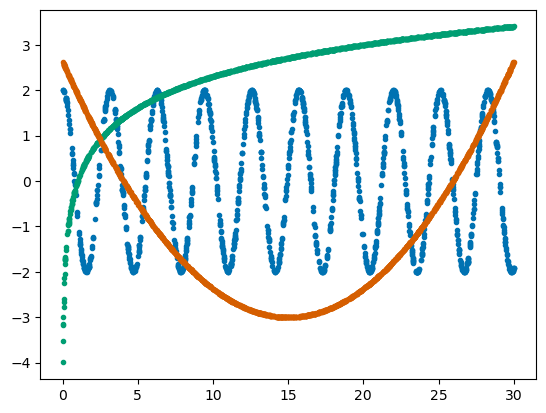

In [66]:
n = 1500
np.random.seed(410)
x = np.random.uniform(low=0, high=30, size=(n,3))
epsilons = np.random.normal(size=n)

# construct f_k
f_1 = lambda z : 2 * np.cos(2 * z); f_2 = lambda z : np.log(z); f_3 = lambda z : 0.025 * ((z - 15)**2) - 3

x1 = x[:,0]; x2 = x[:,1]; x3 = x[:,2]
# construct y
y = f_1(x1) + f_2(x2) + f_3(x3) + epsilons

fig, ax = plt.subplots()
ax.plot(x1, f_1(x1), '.'); ax.plot(x2, f_2(x2), '.'); ax.plot(x3, f_3(x3), '.');

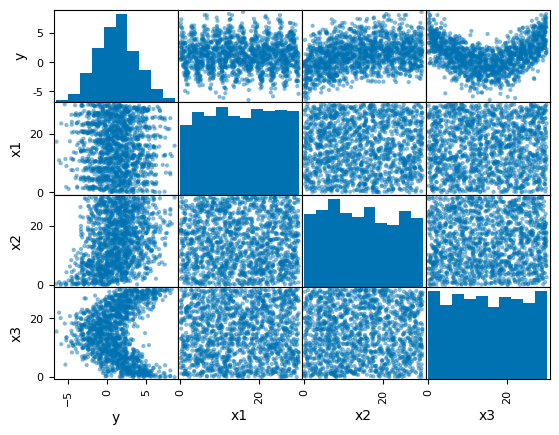

In [89]:
pd.plotting.scatter_matrix(pd.DataFrame({'y':y, 'x1':x1, 'x2':x2, 'x3':x3}), alpha=0.5);

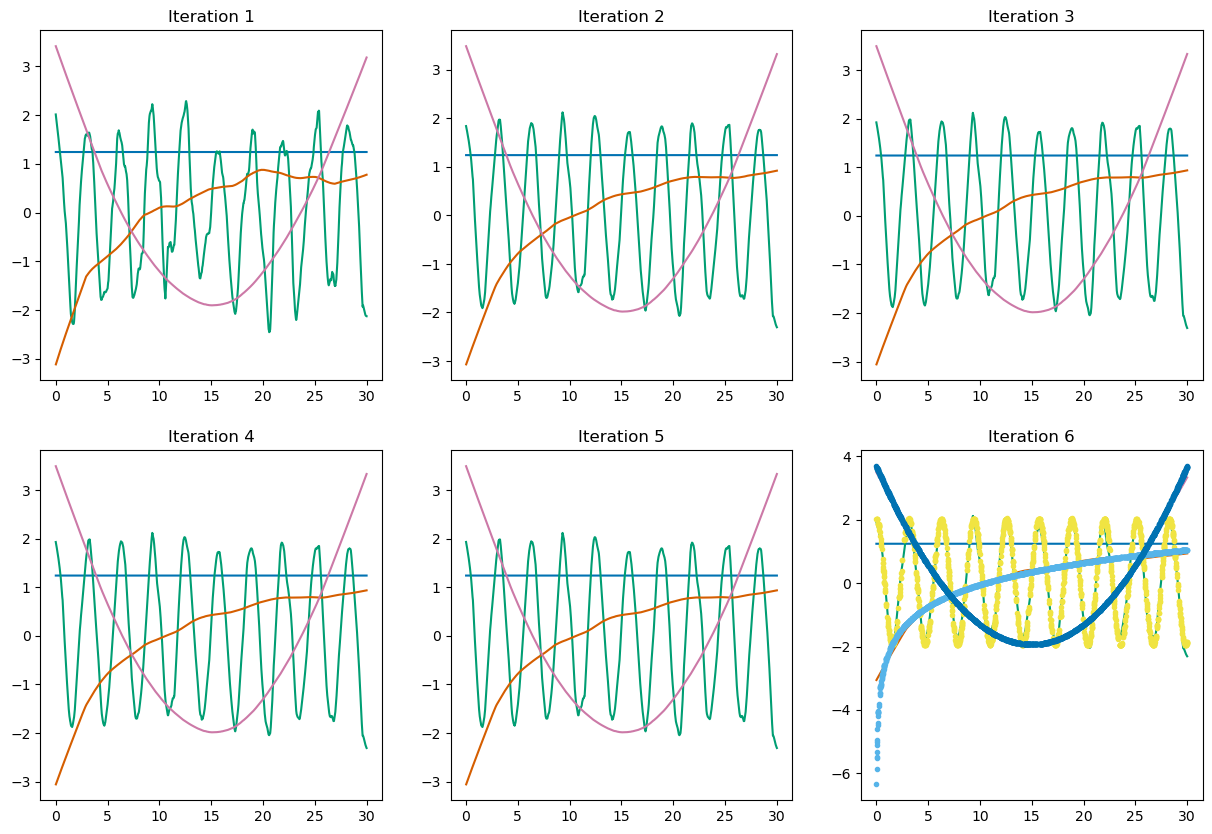

In [227]:
# predefined smoothing matrix/function
lowess_fx_k = [0,
               lambda y,x: sm.nonparametric.lowess(y,x, frac=0.03, return_sorted=False),
               lambda y,x: sm.nonparametric.lowess(y,x, frac=0.2, return_sorted=False),
               lambda y,x: sm.nonparametric.lowess(y,x, frac=0.3, return_sorted=False)]

# initialized functions not yet satisfying sum_i fx_k = 0 for k>0
fx_k = [0*y]*4

# recover additive nonlinear functions
fig, ax = plt.subplots(2,3, figsize=(15,10))
for j in range(6):
    for k in range(len(fx_k)):
        if k==0:
            fx_k[0] = 0*y + (y - sum(fx_k[1:])).mean()
        else:
            epsilons = y - (sum(fx_k) - fx_k[k])
            fx_k[k] = lowess_fx_k[k](epsilons, x[:,k-1])
            fx_k[k] = fx_k[k] - fx_k[k].mean()

        xy = pd.DataFrame({'x':x[:,k-1],'y':fx_k[k]}).sort_values(by='x')
        ax.ravel()[j].plot(xy['x'],xy['y'])
        ax.ravel()[j].set_title("Iteration "+str(j+1))

ax.ravel()[j].plot(x[:,0], 2*np.cos(2*x[:,0]) - np.mean(2*np.cos(2*x[:,0])), '.')
ax.ravel()[j].plot(x[:,1], np.log((x[:,1]))-np.mean(np.log((x[:,1]))), '.')
ax.ravel()[j].plot(x[:,2], .025*(x[:,2]-15)**2-3 - np.mean(.025*(x[:,2]-15)**2-3), '.')        

# [Extra/Omitted/Recommended/Not Required]<br>Regularization 

---

The introduction of the ***penalized least squares*** form of ***smoothing matrices***

$$\min_{S|\lambda, A}||y-Sy||_2^2 + \lambda \left(||Sy||^A_2\right)^2 = \min_{\hat y} (y-\hat y)^T(y-\hat y) + \lambda \hat y^T A\hat y$$

suggests other ***penalized*** forms of the linear regression problem, such as

$$\min_{\beta|\lambda}||y-X\beta||_2^2 + \lambda ||\beta||_p^p$$

which takes the two canonical forms

$$\underset{\text{Lasso Regression $L_1$ coefficient penalty}}{\underline{\min_{\beta|\lambda} \sum_i (y_i-x_i^T \beta)^2 + \lambda \sum_k |\beta_k|}}\quad\quad \underset{\text{Ridge Regression $L_2^2$ coefficient penalty}}{\underline{\min_{\beta|\lambda} \sum_i (y_i-x_i^T \beta)^2 + \lambda \beta^T\beta}} 
$$

The solution to the $L_2^2$ penalty form is also known as ***Tikhonov regularization*** and has the solution

$${\displaystyle {\hat {\beta }}=( {X} ^{\mathsf {T}} \!{X} +\lambda  {I} )^{-1} {X} ^{\mathsf {T}} \!{y} }$$

Adding to the diagonal of the ***grammian*** in $( {X} ^{\mathsf {T}} \!{X} +\lambda  {I} )$ can greatly benefit the ***condition number*** of the problem. And indeed, [this is exactly](https://www.quora.com/Is-it-better-to-do-QR-Cholesky-or-SVD-for-solving-least-squares-estimate-and-why) the kind of solution that is required for an ***ill-conditioned*** design matrix $X$ since no matter how accurate ***QR*** and ***SVD*** can be for solving the ***normal equations***, they will still not be able to adequately address volatility due to ***roundoff error*** in the context of ***ill-conditioning***. 

> The figure below shows the coordinates of the function space for ***simple linear regression***. The intersection of the highest point of the (red contour) likelihood with the (green) restricted "acceptible region" induced by the choice of the $\lambda$ penalty parameter and the $L_p$ regularization will be the $\hat \beta_\lambda$ which optimizes the penalized likelihoods.
>
> ***Regularization*** such as this is generally intended to promote ***generalizability*** of fitted models.  Returning to the notion of ***data smoothing / prediction***, the reason this promotes ***generalizability*** is that even if the "acceptible region" excludes the $f_{\beta}(x) = f^{best}(x) \approx g(x)=E[y|x]$  ***approximation***, the $\hat f(x) = f_{\hat \beta_\lambda}(x) \approx f_{\beta}(x)$ estimation can be improved by restricting $f_{\hat \beta_\lambda}(x)$ to be within the "acceptible region" of the function space. 
>
> This is done by examining so-called ***out of sample*** performance many different choices of the $\lambda$ penalty (tuning) parameter. This effectively allows computation and consideration of many different $
\beta_\lambda$ and the one with the best ***out of sample*** performance can be assumed to have the best accuracy for $f_{\hat \beta_\lambda}(x) \approx E[y|x]$
>
> |![](https://res.cloudinary.com/dyd911kmh/image/upload/v1648205672/image18_a3zz7y.png)|
|:-:|
|The classic image illustrating $L_1$ and $L_2$ regularization from [Introduction to Statistical Learning](https://www.quora.com/When-is-it-better-to-use-Ridge-regression-over-LASSO-regression-and-vice-versa) textbook|


# [Extra/Omitted/Recommended/Not Required]<br>Shrinkage and Bayesian Prior Regularization 


The mechanism of ***ridge*** and ***lasso*** penalties serves to ***shrink*** coefficient estimates towards $0$ by penalizing large coefficient values, this form of ***regularization*** is called  ***shrinkage estimation***. The effect of ***shrinkage regularization*** is to limit the area of the ***function space*** from which $\hat \beta \equiv \hat f$ may be chosen.
For $L_2$ and $L_1$ ***regularization*** this has the respective effect of restricting $\hat \beta$ to be chosen from within "circles" and "45-degree rotated squares" around the origin.

|![](https://wires.onlinelibrary.wiley.com/cms/asset/5c9f3e6c-7808-44ec-81d4-af163d51a5df/wics1463-toc-0001-m.jpg)|<img src="https://miro.medium.com/max/1184/1*IUshR9FUv8fW_e-L9CgrPg.png">|
|:-:|:-:|
|[Bayesian regularization: From Tikhonov to horseshoe](https://onlinelibrary.wiley.com/doi/abs/10.1002/wics.1463) and see [this stack exchange post](https://stats.stackexchange.com/questions/350046/the-graphical-intuiton-of-the-lasso-in-case-p-2) for further clarification|[Handling Sparsity via the Horseshoe](https://faculty.mccombs.utexas.edu/carlos.carvalho/Carvalhoetal2009.pdf)|


Interestingly, the solution to the ***ridge*** and ***lasso regression*** optimization problems is the ***maximum a posteriori*** (MAP) estimate for specific choices of ***Bayesian priors***, i.e.,

> \begin{align*}
\log \left(\left( \prod_{i=1}^n \frac{1}{\sqrt{2\sigma}}e^{-\frac{}{2}\left(\frac{y_i-\mathbf{x}_i^\intercal \boldsymbol{\beta}}{\large \sigma}\right)^2} \right) 
(2\sigma_0)^{-p/2} 
e^{-\frac{(\boldsymbol{\beta}-\boldsymbol{\beta}_0)^\intercal(\boldsymbol{\beta}-\boldsymbol{\beta}_0)}{2\sigma_0^p}}
\right) {} = & 
\sum_{i=1}^n  \log \frac{1}{\sqrt{2\sigma}} - \sum_{i=1}^n \frac{1}{2}\left(\frac{y_i-\mathbf{x}_i^\intercal \boldsymbol{\beta}}{\large \sigma}\right)^2 + \\
 & {} 
\log \left((2\sigma_0)^{-p/2}\right) - \frac{(\boldsymbol{\beta}-\boldsymbol{\beta}_0)^\intercal(\boldsymbol{\beta}-\boldsymbol{\beta}_0)}{2\sigma_0^p}\\\\
\log \left(\left( \prod_{i=1}^n \frac{1}{\sqrt{2\sigma}}e^{-\frac{}{2}\left(\frac{y_i-\mathbf{x}_i^\intercal \boldsymbol{\beta}}{\large \sigma}\right)^2} \right) 
\prod_{k=1}^p
\frac{1}{2b_{k0}} 
e^{-\frac{|\beta_k-\beta_{k0}|}{b_{k0}}}
\right) {} = & 
\sum_{i=1}^n  \log \frac{1}{\sqrt{2\sigma}} - \sum_{i=1}^n \frac{1}{2}\left(\frac{y_i-\mathbf{x}_i^\intercal \boldsymbol{\beta}}{\large \sigma}\right) + \\
 & {} 
\sum_{k=1}^{p} \log \frac{1}{2b_{k0}} - 
\sum_{k=1}^{p} \frac{|\beta_k-\beta_{k0}|}{b_{k0}} 
\end{align*}

With this view however, it is thus clear that ***Bayesian analysis*** naturally provides ***regularization*** through the ***prior*** specification, and different forms of ***shrinkage regularization*** can be induced by specifying different ***priors***.  E.g., 
- ***Gaussian*** and ***Laplace priors*** correspond to $L_2$ and $L_1$ shrinkage
- a ***Cauchy prior*** has the effect of combining the $L_2$ and $L_1$ constraints into a "rounded square diamond" shape
- and the ***horseshoe prior*** can both ***shrink*** and ***inflate*** coefficient estimates. 

# [Extra/Omitted/Recommended/Not Required]<br>Generalizability, Model Complexity, and Underfitting and Overfitting


If model predictions do not ***generalize*** well to future predictions so that $\hat f(x) \not \approx E[y|x]$ then $f$ is said to to be either ***overfit*** or ***underfit***. 
- ***Overfit*** models tend to not ***generalize*** well because they are not consistent from data set to data set; i.e., such models are much more likely to relect the idiosyncrasies of a data set rather than the actual trends in the population of interest.
 > The ***saturated model*** $\hat y = y$, e.g., $X\hat \beta=y$ is maximally ***overfit***.

- ***Underfit*** models do not ***generalize*** well because they are not sufficiently rich to capture relevant variation in the data; however, ***underfit*** models are "reliable" in the sense that their fits tend to be consistently from one data set to the next.
 > The ***null model*** $\hat y = \hat \beta_0$ is maximally ***underfit***.

By controlling accuracy of the approximation, e.g., by
 
- restricting the model class $\mathcal F$ under consideration
- altering the form of the ***design matrix*** in $X\hat \beta \approx y$ 
- adjusting the ***smoothing*** by changing $S$ in $\hat y = Sy$
- tuning a ***reguarlization*** parameter $\lambda$ penalizing, e.g.,
  - $||\beta||$ for linear model regresion contexts
  - $||\hat y ||^A$ for ***smoothing matrix*** contexts

the placement of a model fit on the spectrum between ***overfitting*** and ***underfitting*** can be tuned to optimize for the best ***generalizability*** possible. I.e., flexible enough to capture consistently observable trends in the data, but not so flexible that model fits deviate unstably from one data set to the next.

> Generally, the more flexible a model is the more risk it has to be ***overfit***, while the less flexible a model is the more risk it has to be ***underfit***. 
- So, e.g., larger $\text{rank}(X)$ or $\text{tr}(S)$, can lead to ***overfitting*** while smaller values for these model complexity measures can lead to ***underfitting***. 
- And, e.g., restricting the region of space from which models may be chosen by using a $\lambda$ penalty to ***regularize*** a model fit can reduce the flexibility of the model class under consideration thereby reducing ***overfitting***, even when $\text{rank}(X)$ is large 
  - and the ***effective model complexity*** $\text{tr}(S=(I + \lambda A)^{-1})$ of ***smoothing matrix*** $S$ is automatically inversely proportional to penalty parameter $\lambda$.

# [Extra/Omitted/Recommended/Not Required]<br>Generalizability, Model Complexity, and the Bias-Variance Tradeoff

---

Model ***underfitting*** and ***overfitting*** can be characterized in terms of the celebrated ***bias-variance tradeoff*** derived from the ***generalizability*** measure

$\require{cancel}$

$$\begin{align*}
E\left[\left(y-\hat y\right)^2\right] & {} = E\left[\left(y-E[y] + E[y] - E[\hat y] + E[\hat y] - \hat y \right)^2\right]\\
& {} = E\left[\left(y-E[y]\right)^2\right] + \left(E[ y]-E[\hat y]\right)^2 + E\left[\left(E[\hat y] -\hat y\right)^2\right] + \cancel{E[(y-E[y])(\hat y - E[\hat y])]}^{0?}\\
& {} = \underset{\text{uncertainty}}{\underset{\text{intrinsic/aleatoric}}{{\text{Var}\big[\, y\, \big] \;\, +}}}  \underset{\LARGE \text{underfitting}}{\overbrace{{\underset{\text{model misspecification}}{\underset{\text{squared bias}}{\left(E[ y]-E[\hat y]\right)^2}}}}^{\Large \text{bias} }} \overset{\Large -}{\overset{\Large \vphantom{1pt}}{+}} \underset{\LARGE \text{overfitting}}{\overbrace{{\underset{\text{uncertainty}}{\underset{\text{estimation/epistemic}}{\text{Var}\left[E[\hat y]\right]^{\vphantom{2pt}}}}}}^{\Large \text{variance}}} \overset{\Large \text{tradeoff}}{\Huge \phantom{1pt}}
\end{align*}$$

which implies that 

- ***Underfitting*** can be corrected by increasing model flexibility so $E[\hat y] \approx E[y]$ and the ***model bias*** is decreased; however, this may also cause ***overfitting*** since a more flexibility model may require estimating more parameters (with the same amount of data) which could increase estimation (i.e., ***epistemic***) uncertainty and hence ***model variance*** $\text{Var}\left[E[\hat y]\right]$. 

- ***Overfitting*** can be corrected by decreasing model flexibility so ***model variance*** $\text{Var}\left[E[\hat y]\right]$ is decreased; however, to do so means potentially increasing ***model bias*** $(E[y] - E[\hat y])^2$ and hence  ***underfitting***.

> For unobserved data $y'$ not used to fit a model, choosing a model complexity which produces $\hat y'$ with the smallest ***mean squared error*** (MSE) 
>
> $$f^* = \underset{f_{\text{complexity}}}{\text{argmin}} \frac{1}{n} \sum_i (y_i'-\hat y_i')^2 \approx E[(y-\hat y)^2]$$
>
> suggests an optimal ***bias-variance tradeoff*** where both the ***model bias*** and ***model variance*** have been minimally balanced through the model complexity specification $f^*$.
> - Choosing model complexity for optimal ***generalizability*** in this manner is usually done with "hold out data" schemes such as ***K-folds cross-validation*** which score model "out of sample performance" using various partitions of the data.
> - Plotting the MSE for unobserved data based on, e.g., ***K-folds cross-validation***, against various model complexity settings under considerations is the so-called ***train-test curve***, and the complexity setting with the lowest value on this curve is generally taken to indicate an optimal ***bias-variance tradeoff***.

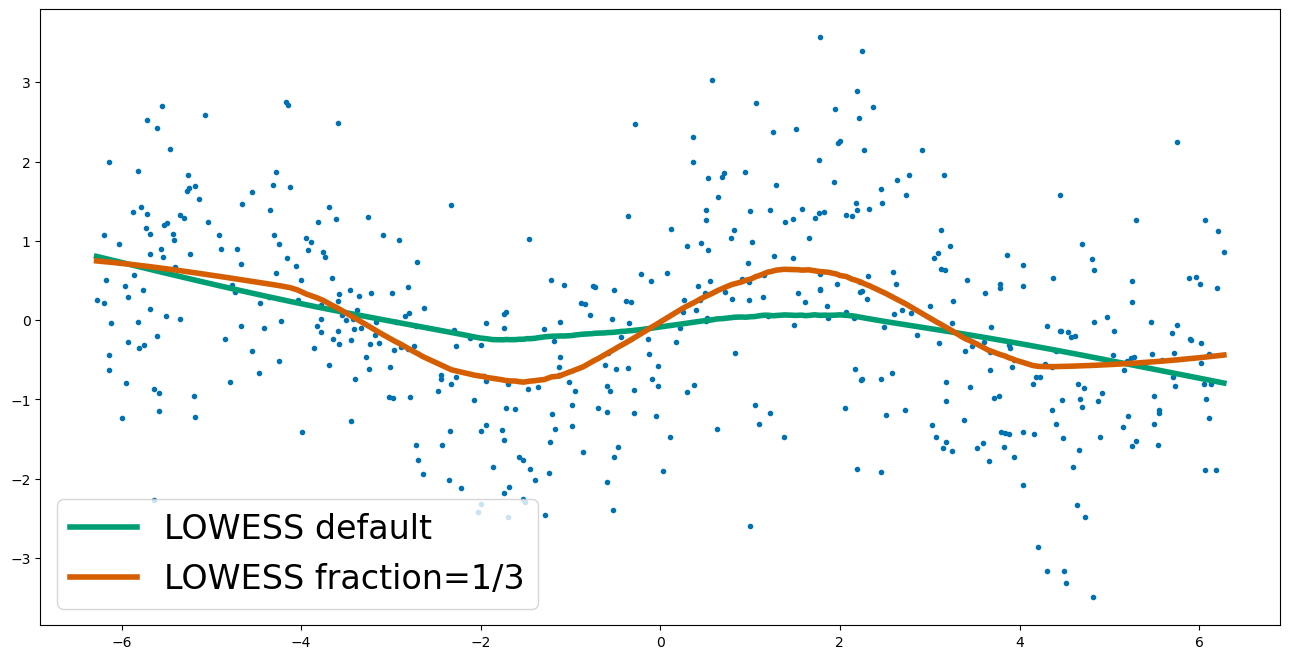

In [90]:
# https://www.statsmodels.org/stable/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html
lowess = sm.nonparametric.lowess
x = np.random.uniform(low = -2*np.pi, high = 2*np.pi, size=500)
y = np.sin(x) + np.random.normal(size=len(x))
z = lowess(y, x)
w = lowess(y, x, frac=1./3)
plt.figure(figsize=(16,8))
plt.plot(x,y,'.')
plt.plot(*z.T, label='LOWESS default', linewidth=4)
plt.plot(*w.T, label='LOWESS fraction=1/3', linewidth=4)
_ = plt.legend(fontsize=24)

In [95]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
from sklearn.model_selection import KFold
# https://stackoverflow.com/questions/36252434/predicting-on-new-data-using-locally-weighted-regression-loess-lowess
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
from scipy.interpolate import interp1d
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
from sklearn.metrics import mean_squared_error   
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator

LOWESS Fraction = 0.05
 Out of Sample K-Folds MSE
 1.14709 1.06979 0.94116 1.3277 1.40268

LOWESS Fraction = 0.06
 Out of Sample K-Folds MSE
 1.13239 1.05281 0.91181 1.31571 1.35944

LOWESS Fraction = 0.07
 Out of Sample K-Folds MSE
 1.12129 1.04493 0.9041 1.29858 1.31953

LOWESS Fraction = 0.08
 Out of Sample K-Folds MSE
 1.11348 1.02887 0.90077 1.29394 1.29708

LOWESS Fraction = 0.09
 Out of Sample K-Folds MSE
 1.10127 1.01978 0.89429 1.2856 1.28282

LOWESS Fraction = 0.1
 Out of Sample K-Folds MSE
 1.09327 1.00901 0.89051 1.27507 1.2725

LOWESS Fraction = 0.11
 Out of Sample K-Folds MSE
 1.07946 0.99966 0.88706 1.27016 1.26359

LOWESS Fraction = 0.12
 Out of Sample K-Folds MSE
 1.06503 0.99636 0.88488 1.26285 1.25672

LOWESS Fraction = 0.13
 Out of Sample K-Folds MSE
 1.05946 0.99012 0.88639 1.25622 1.25722

LOWESS Fraction = 0.14
 Out of Sample K-Folds MSE
 1.05332 0.98489 0.88405 1.25134 1.25849

LOWESS Fraction = 0.15
 Out of Sample K-Folds MSE
 1.05035 0.98273 0.88255 1.24855 1.

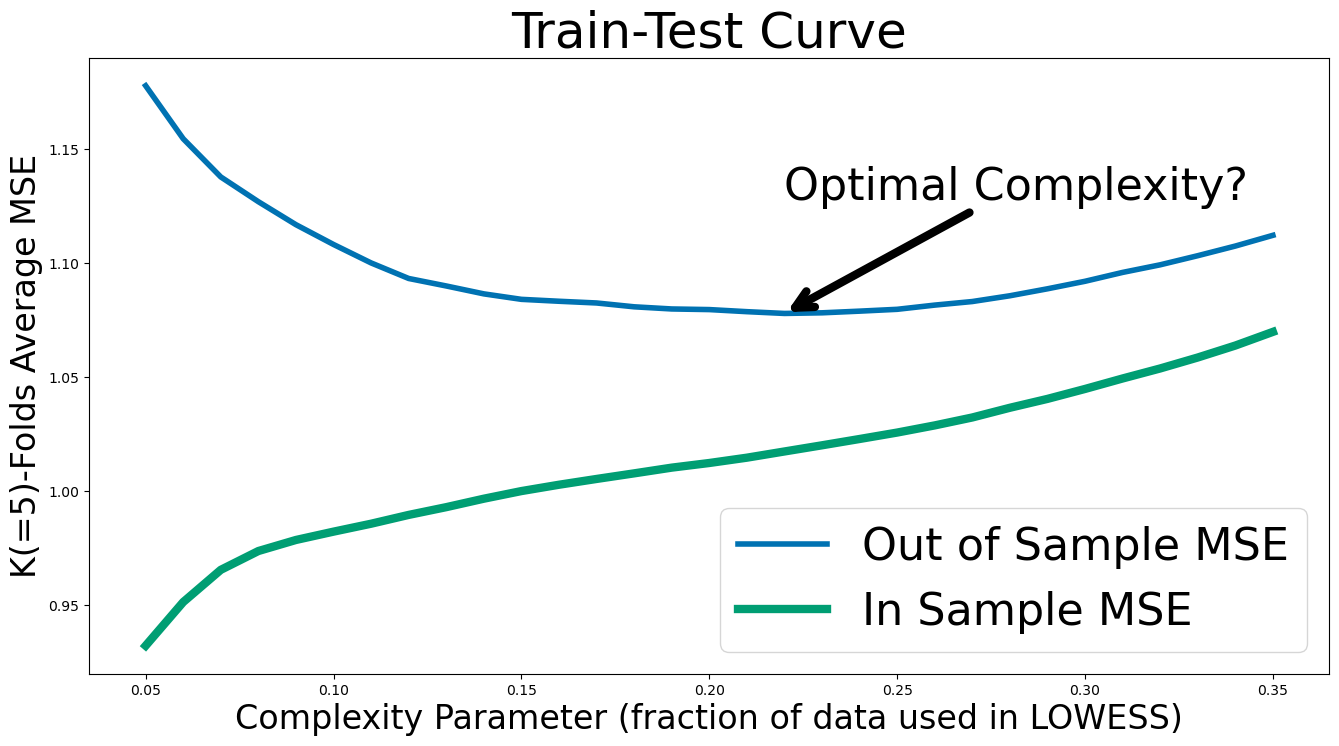

In [93]:
kf = KFold(n_splits=5) # 3 and 10 are common alterntives
complexity_grid = np.linspace(0.05,0.35,31)
complexity_grid_average_KFoldsMSEs = []
complexity_grid_average_MSEs = []
for frac in complexity_grid:
  print("LOWESS Fraction =", str(np.round(frac,3)))
  print(" Out of Sample K-Folds MSE")
  KFoldsOutOfSampleMSEs=[]
  KFoldsInSampleMSEs=[]
  for train_index, test_index in kf.split(x[:,np.newaxis]):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    xyhat = lowess(y_train, x_train, frac=frac)
    yhat = interp1d(*xyhat.T, bounds_error=False, fill_value="extrapolate")
    KFoldsOutOfSampleMSEs += [mean_squared_error(y_test, yhat(x_test))]
    KFoldsInSampleMSEs += [mean_squared_error(y_train, yhat(x_train))]
    print("",str(np.round(KFoldsOutOfSampleMSEs[-1],5)), end='')
  complexity_grid_average_KFoldsMSEs += [np.mean(KFoldsOutOfSampleMSEs)]
  complexity_grid_average_MSEs += [np.mean(KFoldsInSampleMSEs)]
  print("\n")

minMSE = np.min(complexity_grid_average_KFoldsMSEs)
optimal_complexity = complexity_grid[np.argmin(complexity_grid_average_KFoldsMSEs)]
plt.figure(figsize=(16,8))
plt.plot(complexity_grid, complexity_grid_average_KFoldsMSEs, 
         label='Out of Sample MSE', linewidth=4)
plt.plot(complexity_grid, complexity_grid_average_MSEs, 
         label='In Sample MSE', linewidth=6)
plt.xlabel('Complexity Parameter (fraction of data used in LOWESS)', fontsize=24)
plt.ylabel('K(=5)-Folds Average MSE', fontsize=24)
plt.title('Train-Test Curve', fontsize=36)
plt.annotate("Optimal Complexity?", xy=(optimal_complexity, minMSE), 
             xytext=(optimal_complexity, minMSE+0.05), 
             arrowprops=dict(arrowstyle="->", linewidth=6), fontsize=32)
_ = plt.legend(loc="lower right", fontsize=32)

In [94]:
# https://scikit-learn.org/stable/developers/develop.html#rolling-your-own-estimator
class lowess4sklearn(BaseEstimator):

  def __init__(self, frac=0.5):
    self.frac = frac

  def fit(self, X, y):
    self.xyhat = lowess(y, X[:,0], frac=self.frac)
    return self.xyhat[:,1]

  def predict(self, X):
    yhat = interp1d(*self.xyhat.T, bounds_error=False, fill_value="extrapolate")
    return yhat(X)

  # https://scikit-learn.org/stable/developers/develop.html#get-params-and-set-params

  def get_params(self, deep=True):
      # suppose this estimator has parameters "alpha" and "recursive"
      return {"frac": self.frac}

  def set_params(self, **parameters):
      for parameter, value in parameters.items():
          setattr(self, parameter, value)
      return self

GridSearchCV(estimator=lowess4sklearn(),
             param_grid={'frac': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35])},
             scoring='neg_mean_squared_error')
Optimal {'frac': 0.22000000000000003}


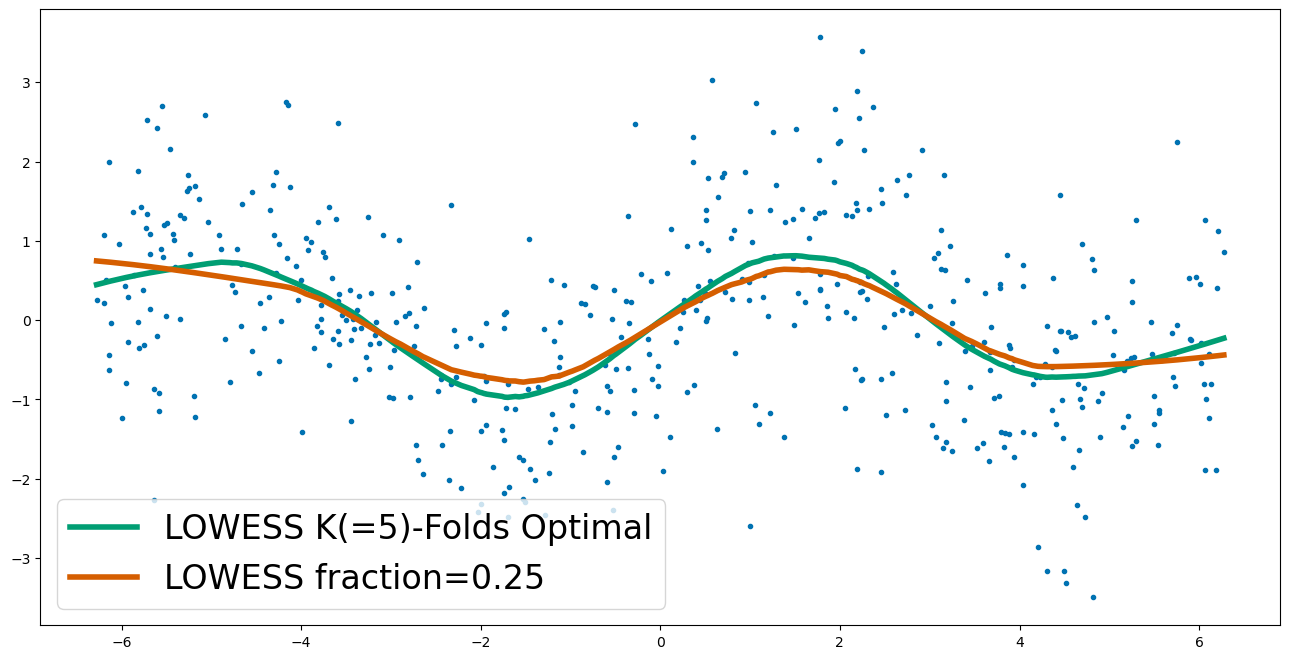

In [96]:
# Or just...

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
parameters = {'frac': complexity_grid}
optimal_smoother = GridSearchCV(lowess4sklearn(), parameters, 
                                scoring='neg_mean_squared_error')
print(optimal_smoother.fit(x[:,np.newaxis], y))
print("Optimal", optimal_smoother.best_params_)

plt.figure(figsize=(16,8)); plt.plot(x,y,'.')
plt.plot(sorted(x),optimal_smoother.predict(sorted(x[:,np.newaxis])), 
         label='LOWESS K(=5)-Folds Optimal', linewidth=4)
w = lowess(y, x, frac=1./3); plt.plot(*w.T, label='LOWESS fraction=0.25', linewidth=4)
_ = plt.legend(fontsize=24)

# Although, to use the `sm.nonparametric.lowess` smoother it must be
# "scikit-learn compatible" as done below